# Plot Temp and RH trends over time

In [20]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import csv
import glob
import re
from datetime import datetime

In [21]:
datetime_to_plot = '2026-02-26'
# print(datetime_to_plot)
dir_to_search = '/home/daq/Desktop/to_git/ArduinoPyMonitor/MonitorTXT'
files = glob.glob(f'{dir_to_search}/{datetime_to_plot}*',)
print(files)
df_data = pd.DataFrame()
for file in files:
    df_temp = pd.read_csv(file,sep='\t',header=0)
    # print(df_temp)
    df_data = pd.concat([df_data,df_temp],ignore_index=True)
df_data.sort_values(['Time'],inplace=True)
print(df_data)
# print(type(df_data['Time'][0]))


['/home/daq/Desktop/to_git/ArduinoPyMonitor/MonitorTXT/2026-02-26.txt']
                            Time  Humidity (%)  Temperature (C)
0     2026-02-26 12:55:08.761747          17.0             16.0
1     2026-02-26 12:55:16.330051          16.0             15.0
2     2026-02-26 12:55:22.387534          15.0             15.0
3     2026-02-26 12:55:28.445081          15.0             14.0
4     2026-02-26 12:55:34.502753          14.0             14.0
...                          ...           ...              ...
1602  2026-02-26 15:38:45.692206          75.0             18.0
1603  2026-02-26 15:38:51.749839          75.0             18.0
1604  2026-02-26 15:38:57.807469          75.0             18.0
1605  2026-02-26 15:39:03.865041          75.0             18.0
1606  2026-02-26 15:39:09.922726          75.0             18.0

[1607 rows x 3 columns]


Index(['Time', 'Humidity (%)', 'Temperature (C)'], dtype='object')


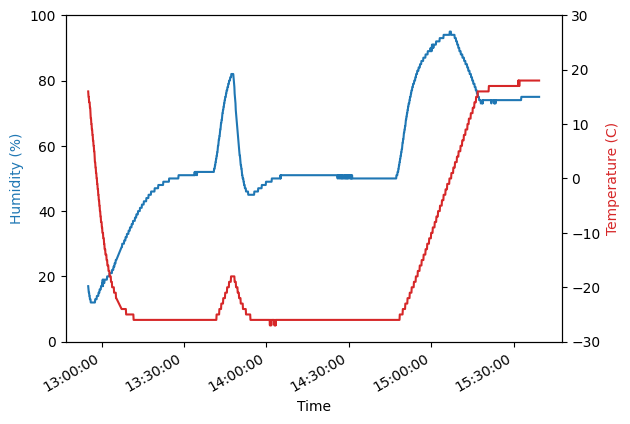

In [22]:
cols = df_data.columns
print(cols)
colors = ('tab:blue','tab:red')
times = [datetime.strptime(t,r'%Y-%m-%d %H:%M:%S.%f') for t in df_data[cols[0]]]
fig, ax = plt.subplots()
ax.plot(times,df_data[cols[1]],label=cols[1],color=colors[0])
ax.set_ylabel(cols[1],color=colors[0])
ax.set_xlabel('Time')
ax.set_ylim(0,100)
xfmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)

ax2 = ax.twinx()
ax2.plot(times,df_data[cols[2]],label=cols[2],color=colors[1])
ax2.set_ylabel(cols[2],color=colors[1])
ax2.set_ylim(-30,30)

fig.autofmt_xdate()
plt.show()